$\sigma_i^2=\left\langle(v_i-\langle v_i\rangle)^2\right\rangle=\left\langle v_i^2-\langle v_i\rangle^2\right\rangle$
2ter Term entspricht np.std()^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace

%matplotlib inline

In [2]:
### import data of simulation w/ IMBH1 ###
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,x_1,y_1,z_1,vx_1,vy_1,vz_1,vr_1,vtheta_1,vphi_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation w/ IMBH2 ###
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,x_2,y_2,z_2,vx_2,vy_2,vz_2,vr_2,vtheta_2,vphi_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation w/o IMBH 1 ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1,vr_wo_1,vtheta_wo_1,vphi_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,29,30,31,32,33,34,35,36,37), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation w/o IMBH 2 ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2,vr_wo_2,vtheta_wo_2,vphi_wo_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### initialize phasespcae objects ###
bh_1=GCphasespace(r_3d_1,bin_num=50)
bh_2=GCphasespace(r_3d_2,bin_num=50)
wobh_1=GCphasespace(r_3d_wo_1,bin_num=50)
wobh_2=GCphasespace(r_3d_wo_2,bin_num=50)

In [7]:
### load half light and half mass radii for both simulations ###
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')
print(hmr_bh_1,hmr_wo_bh_1)

4.13329 7.8937


In [8]:
### calculates mean distance, mean velocity, velocity dispersion and anisotropy parameter ###
R_bh_1=bh_1.mean_distance(r_3d_1)
v_bh_1=bh_1.mean_velocity(vr_1,vtheta_1,vphi_1)
vel_disp_bh_1=bh_1.velocity_dispersion(vr_1,vtheta_1,vphi_1)
beta_bh_1=bh_1.anisotropy_param(vr_1,vtheta_1,vphi_1)

R_bh_2=bh_2.mean_distance(r_3d_2)
v_bh_2=bh_1.mean_velocity(vr_2,vtheta_2,vphi_2)
vel_disp_bh_2=bh_2.velocity_dispersion(vr_2,vtheta_2,vphi_2)
beta_bh_2=bh_2.anisotropy_param(vr_2,vtheta_2,vphi_2)

R_wobh_1=wobh_1.mean_distance(r_3d_wo_1)
v_wo_bh_1=wobh_1.mean_velocity(vr_wo_1,vtheta_wo_1,vphi_wo_1)
vel_disp_wobh_1=wobh_1.velocity_dispersion(vr_wo_1,vtheta_wo_1,vphi_wo_1)
beta_wobh_1=wobh_1.anisotropy_param(vr_wo_1,vtheta_wo_1,vphi_wo_1)

R_wobh_2=wobh_2.mean_distance(r_3d_wo_2)
v_wo_bh_2=wobh_2.mean_velocity(vr_wo_2,vtheta_wo_2,vphi_wo_2)
vel_disp_wobh_2=wobh_2.velocity_dispersion(vr_wo_2,vtheta_wo_2,vphi_wo_2)
beta_wobh_2=wobh_2.anisotropy_param(vr_wo_2,vtheta_wo_2,vphi_wo_2)


In [9]:
### calculate distance over effective radius ###
r_plot_bh_1=R_bh_1/hmr_bh_1
r_plot_bh_2=R_bh_2/hmr_bh_2
r_plot_wobh_1= R_wobh_1/hmr_wo_bh_1
r_plot_wobh_2= R_wobh_2/hmr_wo_bh_2

In [14]:
print(v_bh_1)

(array([ 0.05204322,  0.01775684, -0.07134343, -0.00842207, -0.1203419 ,
       -0.09031746, -0.07236657, -0.05006861, -0.06333633, -0.04964164,
        0.06083436, -0.14162185,  0.05204995,  0.02443146, -0.04581717,
       -0.02083102, -0.11614707, -0.07674934, -0.10088521, -0.07721398,
       -0.0465081 , -0.00021641, -0.00596312,  0.03942474,  0.05303372,
       -0.02552403,  0.06862094,  0.04660179, -0.10069749,  0.00543631,
       -0.0396428 , -0.0207516 , -0.02073493, -0.02892359, -0.10794927,
       -0.05171539, -0.04401692, -0.00218269, -0.04295762, -0.00129423,
        0.00182022,  0.01128679, -0.01871895,  0.05106607, -0.00738785,
       -0.01557245, -0.01319614,  0.0029687 ,  0.00655624,  0.00871724]), array([ 0.05161482, -0.07799616,  0.08786024,  0.04816633,  0.01594351,
       -0.02185015, -0.04508362, -0.01738584, -0.04098148, -0.02937287,
       -0.02636405, -0.09770306,  0.02989416, -0.00235121, -0.00103389,
        0.01313873,  0.05977095, -0.04840002,  0.01253649, -0

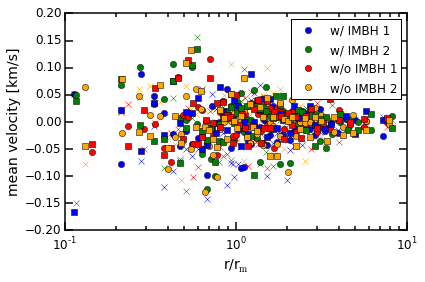

In [24]:
### plots mean velocity ###

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

#ax1.grid(True)
ax1.semilogx(r_plot_bh_1,v_bh_1[0],'b',linestyle='None',marker='x')
ax1.semilogx(r_plot_bh_2,v_bh_2[0],'g',marker='x',ls='None')
ax1.semilogx(r_plot_wobh_1,v_wo_bh_1[0],'r',marker='x',ls='None')
ax1.semilogx(r_plot_wobh_2,v_wo_bh_2[0],marker='x',color='orange',ls='None')

ax1.semilogx(r_plot_bh_1,v_bh_1[1],'b',marker='o',ls='None',label='w/ IMBH 1')
ax1.semilogx(r_plot_bh_2,v_bh_2[1],'g',marker='o',ls='None',label='w/ IMBH 2')
ax1.semilogx(r_plot_wobh_1,v_wo_bh_1[1],'r',marker='o',ls='None',label='w/o IMBH 1')
ax1.semilogx(r_plot_wobh_2,v_wo_bh_2[1],marker='o',color='orange',ls='None',label='w/o IMBH 2')

ax1.semilogx(r_plot_bh_1,v_bh_1[2],'b',linestyle='None',marker='s')
ax1.semilogx(r_plot_bh_2,v_bh_2[2],'g',marker='s',ls='None')
ax1.semilogx(r_plot_wobh_1,v_wo_bh_1[2],'r',marker='s',ls='None')
ax1.semilogx(r_plot_wobh_2,v_wo_bh_2[2],marker='s',color='orange',ls='None')
#ax1.errorbar(R,sigrad_r3d_neu,sigraderr,fmt='.')
ax1.legend(loc=0,numpoints=1)
#ax1.set_xlim(0.4,100)
ax1.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax1.set_ylabel('mean velocity [km/s]',fontsize=14)

#ax2.set_xlim((0.4/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)

fig.tight_layout()
#plt.show()
fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/mean_velocity.pdf',format='pdf',bbox_inches='tight')

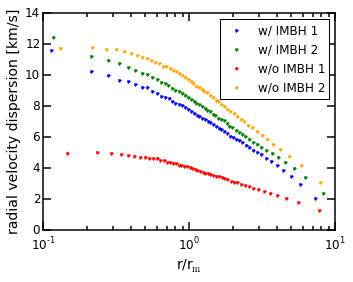

In [10]:
### plots radial velocity dispersion ###

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

#ax1.grid(True)
ax1.semilogx(r_plot_bh_1,vel_disp_bh_1[0],'b.',label='w/ IMBH 1')
ax1.semilogx(r_plot_bh_2,vel_disp_bh_2[0],'g.',label='w/ IMBH 2')
ax1.semilogx(r_plot_wobh_1,vel_disp_wobh_1[0],'r.',label='w/o IMBH 1')
ax1.semilogx(r_plot_wobh_2,vel_disp_wobh_2[0],'.',color='orange',label='w/o IMBH 2')
#ax1.errorbar(R,sigrad_r3d_neu,sigraderr,fmt='.')
ax1.legend(loc=0,numpoints=1)
#ax1.set_xlim(0.4,100)
ax1.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax1.set_ylabel('radial velocity dispersion [km/s]',fontsize=14)

#ax2.set_xlim((0.4/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)

fig.tight_layout()
#plt.show()
fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/radial_velocity_dispersion.pdf',format='pdf',bbox_inches='tight')

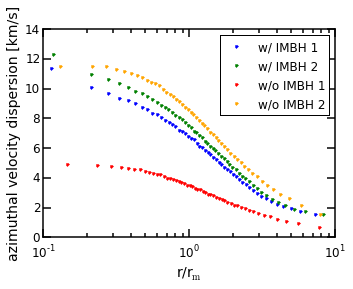

In [11]:
### plots azimuthal velocity dispersion ###

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()
#ax1.grid(True)

ax1.semilogx(r_plot_bh_1,vel_disp_bh_1[1],'b.',label='w/ IMBH 1')
ax1.semilogx(r_plot_bh_2,vel_disp_bh_2[1],'g.',label='w/ IMBH 2')

ax1.semilogx(r_plot_wobh_1,vel_disp_wobh_1[1],'r.',label='w/o IMBH 1')
ax1.semilogx(r_plot_wobh_2,vel_disp_wobh_2[1],'.',color='orange',label='w/o IMBH 2')

ax1.legend(loc=0,numpoints=1)

#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
#ax1.set_xlim(0.1,100)
ax1.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax1.set_ylabel('azimuthal velocity dispersion [km/s]',fontsize=14)

#ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()


#plt.show()
fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/azimuthal_velocity_dispersion.pdf',format='pdf',bbox_inches='tight')

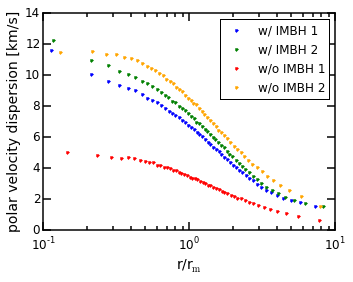

In [12]:
### plots polar velocity dispersion ###

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()
#ax1.grid(True)

#ax1.semilogx(R,sigphi_r3d,'.')
ax1.semilogx(r_plot_bh_1,vel_disp_bh_1[2],'b.',label='w/ IMBH 1')
ax1.semilogx(r_plot_bh_2,vel_disp_bh_2[2],'g.',label='w/ IMBH 2')
ax1.semilogx(r_plot_wobh_1,vel_disp_wobh_1[2],'r.',label='w/o IMBH 1')
ax1.semilogx(r_plot_wobh_2,vel_disp_wobh_2[2],'.',color='orange',label='w/o IMBH 2')
#ax1.errorbar(R,sigphi_r3d,sigphierr,fmt='.')
ax1.legend(loc=0,numpoints=1)

#ax1.set_xlim(0.1,100)
ax1.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax1.set_ylabel('polar velocity dispersion [km/s]',fontsize=14)

#ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()


fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/polar_velocity_dispersion.pdf',format='pdf',bbox_inches='tight')

Anisotropy parameter beta 
---
$$\beta\equiv1-\frac{\sigma_\theta^2+\sigma_\phi^2}{2\sigma_r^2}$$

Quelle: Binney&Tremaine 2008 eq. (4.61)

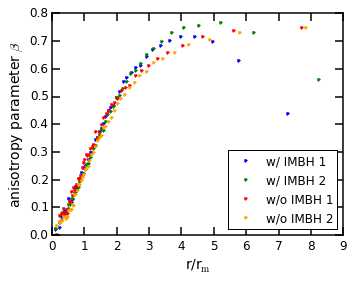

In [13]:
### plots anisotropy parameter beta ###

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

#ax1.grid(True)

ax1.plot(r_plot_bh_1,beta_bh_1,'b.',label='w/ IMBH 1')
ax1.plot(r_plot_bh_2,beta_bh_2,'g.',label='w/ IMBH 2')
ax1.plot(r_plot_wobh_1,beta_wobh_1,'r.',label='w/o IMBH 1')
ax1.plot(r_plot_wobh_2,beta_wobh_2,'.',color='orange',label='w/o IMBH 2')
ax1.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax1.set_ylabel('anisotropy parameter $\\beta$',fontsize=14)

ax1.legend(loc=0,numpoints=1)

#ax2.set_xlim((0./5000)*360*3600/(2*np.pi),(35./5000)*360*3600/(2*np.pi))
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/anisotropy_parameter_beta.pdf', format='pdf',bbox_inches='tight')

In [14]:
print(hmr_bh_1,hmr_wo_bh_1)

4.13329 7.8937
